# Electronic band structure of graphene

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)

## 1. One-dimensional band structures

### 1.1 Free electrons: 

$ E(k) = \frac{p^2}{2m} = \frac{\hbar^2}{2m}k^2$ is the solution of the 

stationary Schrödinger equation without any potential $ -\frac{\hbar^2}{2m}\phi''(x) = E\phi(x). $

The corresponding wave function is called a "plane wave" $ \phi(x) \propto e^{ikx}.$

### 1.2 Quasi-free electrons in a periodic crystal:

Lattice periodic potential $ V(x)=V(x+na) $ of the periodic atomic lattice modifies the 

stationary Schrödinger equation $ -\frac{\hbar^2}{2m}\phi''(x) = \left[E-V(x)\right]\phi(x). $

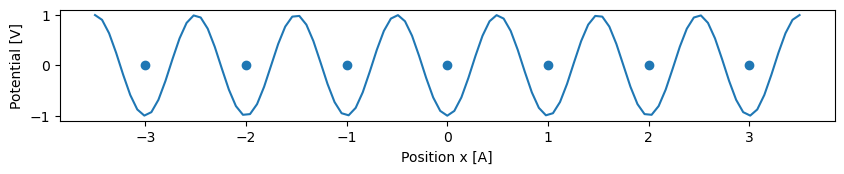

In [6]:
x_array = np.linspace(-3.5, 3.5, 101)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(0.5)
plt.xlabel("Position x [A]")
plt.ylabel("Potential [V]")

plt.plot(
    x_array, -np.cos(x_array * 2 * np.pi)     ### Potential periodic
) 
plt.scatter(
    np.linspace(-3, 3, 7), np.zeros(7)   ## position of atoms in lattice
)

The wave functions become periodic "Bloch functions" (in $ x $ and $ k $) and the eigenenergies change. 

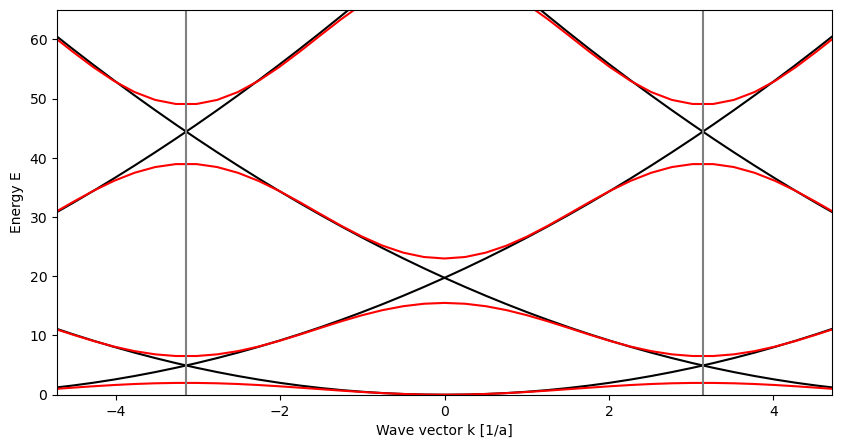

In [ ]:
k_array = np.linspace(-4* np.pi, 4 *np.pi, 101)
E_array = 0.5 * k_array **2

plt.xlabel('Wave vector k [1/a]')
plt.ylabel('Energy E')
plt.xlim([-1.5*np.pi, 1.5 * np.pi])
plt.ylim([0, 65])
plt.plot(
    k_array, E_array, 'black',
    k_array + 2 *np.pi, E_array, 'black',
    k_array -2 *np.pi, E_array, 'black',
    k_array + 4 *np.pi, E_array, 'black',
    k_array - 4 *np.pi, E_array, 'black',
    k_array - 6 *np.pi, E_array, 'black',
    k_array + 6 *np.pi, E_array, 'black',
    k_array - 8 *np.pi, E_array, 'black',
    k_array + 8 *np.pi, E_array, 'black',
    
    k_array, -np.cos(k_array) + 1, 'red',
    k_array, 4.5 * np.cos(k_array) + 11, 'red',
    k_array, -8 * np.cos(k_array) + 31, 'red',
    k_array, 11 * np.cos(k_array) + 60, 'red',
    
    [-np.pi, -np.pi], [0, 65], 'gray',
    [np.pi, np.pi], [0, 65], 'gray'
)

## Briulione zone we have defined for 
## Energy is also periodic with period 2π in dirrection of K
## This describes band structure of graphene to some extent 

- As a main effect, band crossings split up
- Still, periodicidy is conserved (periodicity is $ k = \frac{2\pi}{a} $ )

## 2. Two-dimensional band structure of graphene

### 2.1 Plot a graphene lattice

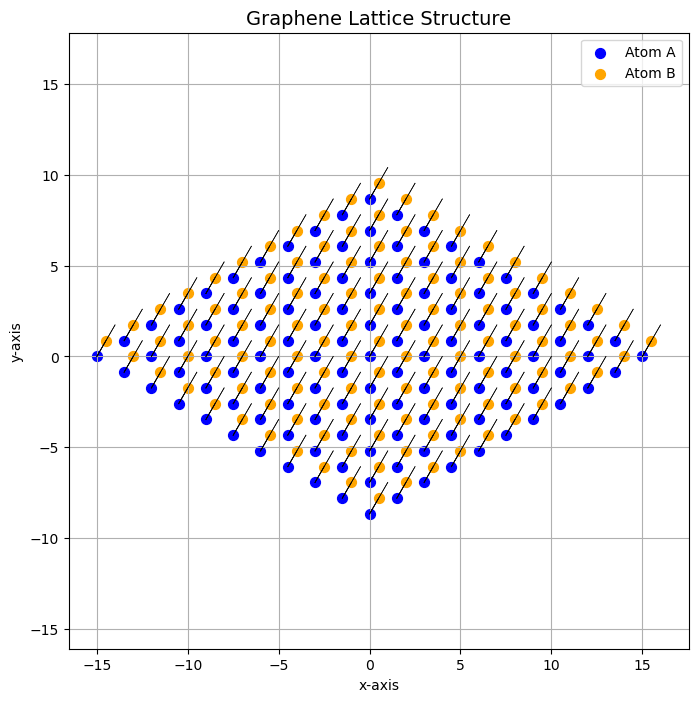

In [19]:
# Define lattice vectors
a1 = np.array([1.5, np.sqrt(3) / 2])
a2 = np.array([1.5, -np.sqrt(3) / 2])

## Define basis vectors
b1 = np.array([0,0])
b2 = np.array([0.5, np.sqrt(3) / 2])

## Generate lattice points
def generate_lattice(n):
    lattice_points = []
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            R = i * a1 + j * a2
            lattice_points.append(R)
    return np.array(lattice_points)

## Generate basis points and lattice
n = 5  ## Size of lattice
data = generate_lattice(n)

## Plot the lattice structure 
plt.figure(figsize= (8,8))
for R in data:
     # Add basis vectors to each lattice point
    plt.scatter(R[0] + b1[0], R[1] + b1[1], color='blue', label='Atom A', s=50)
    plt.scatter(R[0] + b2[0], R[1] + b2[1], color='orange', label='Atom B', s=50)
   

# Draw connections between atoms
for R in data:
    neighbors = [b1, b2, b2 - b1, -b1, -b2, b1 - b2]
    for neighbor in neighbors:
        atom_a = R + b1
        atom_b = R + neighbor + b2
        plt.plot([atom_a[0], atom_b[0]], [atom_a[1], atom_b[1]], color='black', lw=0.5)

# Formatting the plot
plt.title('Graphene Lattice Structure', fontsize=14)
plt.axis('equal')
plt.grid(True)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(['Atom A', 'Atom B'], loc='upper right', fontsize=10)
plt.show()
 

In [20]:
a0 = 1.418   ## in Angstorm (carbon - carbon bond length)
latlength = np.sqrt(3.) * a0 


### 2.2 Tight-binding description & band structure

<>:35: SyntaxWarning: invalid escape sequence '\A'
<>:36: SyntaxWarning: invalid escape sequence '\A'
<>:35: SyntaxWarning: invalid escape sequence '\A'
<>:36: SyntaxWarning: invalid escape sequence '\A'
C:\Users\disha\AppData\Local\Temp\ipykernel_43820\753041007.py:35: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('k$_x$ (1/$\AA$)')
C:\Users\disha\AppData\Local\Temp\ipykernel_43820\753041007.py:36: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel('k$_y$ (1/$\AA$)')


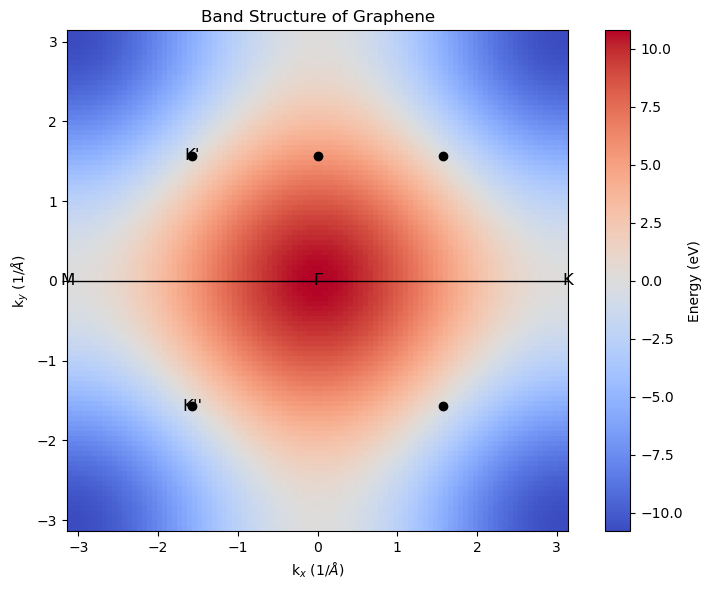

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# High symmetry points in the graphene Brillouin zone
kx_points = np.linspace(-np.pi, np.pi, 100)
ky_points = np.linspace(-np.pi, np.pi, 100)
kx, ky = np.meshgrid(kx_points, ky_points)

# Define the hopping parameters for graphene
t = -2.7  # Hopping energy in eV

# Band structure calculation (tight-binding model)
E = np.zeros_like(kx)

for i in range(kx.shape[0]):
    for j in range(kx.shape[1]):
        kx_val = kx[i, j]
        ky_val = ky[i, j]
        E[i, j] = -2 * t * (np.cos(kx_val) + np.cos(ky_val))

# Plotting
plt.figure(figsize=(8, 6))
plt.imshow(E, extent=(-np.pi, np.pi, -np.pi, np.pi), origin='lower', cmap='coolwarm')
plt.colorbar(label='Energy (eV)')
plt.plot(np.linspace(-np.pi, np.pi, 5), [0]*5, 'k-', lw=1)  # High symmetry points
plt.scatter([0, -np.pi/2, np.pi/2, np.pi/2, -np.pi/2], [np.pi/2, np.pi/2, np.pi/2, -np.pi/2, -np.pi/2], color='k')

# Labels for high symmetry points
plt.text(0, 0, 'Γ', fontsize=12, ha='center', va='center')
plt.text(np.pi, 0, 'K', fontsize=12, ha='center', va='center')
plt.text(-np.pi, 0, 'M', fontsize=12, ha='center', va='center')
plt.text(-np.pi/2, np.pi/2, 'K\'', fontsize=12, ha='center', va='center')
plt.text(-np.pi/2, -np.pi/2, 'K\'\'', fontsize=12, ha='center', va='center')

plt.xlabel('k$_x$ (1/$\AA$)')
plt.ylabel('k$_y$ (1/$\AA$)')
plt.title('Band Structure of Graphene')
plt.grid(False)
plt.tight_layout()
plt.show()


### 2.3 Cut through the Dirac points (linear band crossings)

Classical electrons: $ E(k) = \frac{p^2}{2m} = \frac{\hbar^2}{2m}k^2$

Relativistic electrons: $ E(k) = \pm\sqrt{p^2c^2+m_0^2c^4}$

Massless relativistic electrons: $ E(k) = \pm pc$

<>:41: SyntaxWarning: invalid escape sequence '\A'
<>:42: SyntaxWarning: invalid escape sequence '\A'
<>:41: SyntaxWarning: invalid escape sequence '\A'
<>:42: SyntaxWarning: invalid escape sequence '\A'
C:\Users\disha\AppData\Local\Temp\ipykernel_43820\192736481.py:41: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('k$_x$ (1/$\AA$)')
C:\Users\disha\AppData\Local\Temp\ipykernel_43820\192736481.py:42: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel('k$_y$ (1/$\AA$)')


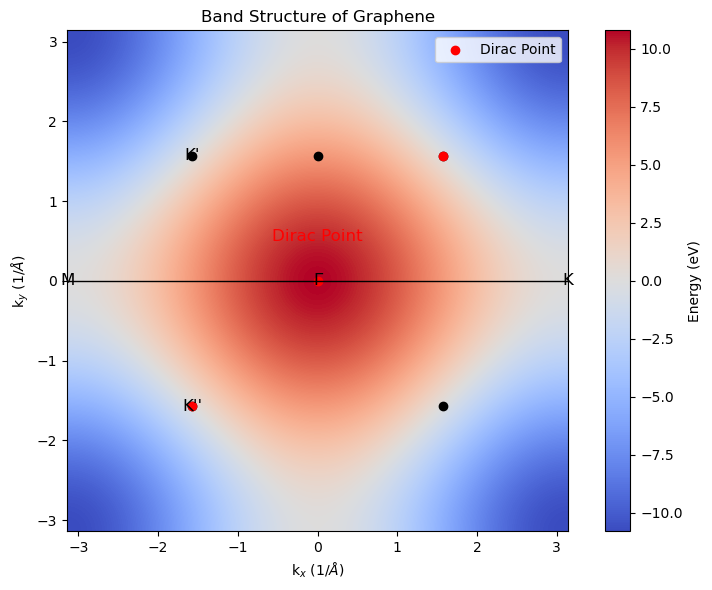

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# High symmetry points in the graphene Brillouin zone
kx_points = np.linspace(-np.pi, np.pi, 1000)
ky_points = np.linspace(-np.pi, np.pi, 1000)
kx, ky = np.meshgrid(kx_points, ky_points)

# Define the hopping parameters for graphene
t = -2.7  # Hopping energy in eV

# Band structure calculation (tight-binding model)
E = np.zeros_like(kx)

for i in range(kx.shape[0]):
    for j in range(kx.shape[1]):
        kx_val = kx[i, j]
        ky_val = ky[i, j]
        E[i, j] = -2 * t * (np.cos(kx_val) + np.cos(ky_val))

# Highlight Dirac points and linear band crossings
plt.figure(figsize=(8, 6))
plt.imshow(E, extent=(-np.pi, np.pi, -np.pi, np.pi), origin='lower', cmap='coolwarm')
plt.colorbar(label='Energy (eV)')
plt.plot(np.linspace(-np.pi, np.pi, 5), [0]*5, 'k-', lw=1)  # High symmetry points
plt.scatter([0, -np.pi/2, np.pi/2, np.pi/2, -np.pi/2], [np.pi/2, np.pi/2, np.pi/2, -np.pi/2, -np.pi/2], color='k')

# Labeling high symmetry points and Dirac points
plt.text(0, 0, 'Γ', fontsize=12, ha='center', va='center')
plt.text(np.pi, 0, 'K', fontsize=12, ha='center', va='center')
plt.text(-np.pi, 0, 'M', fontsize=12, ha='center', va='center')
plt.text(-np.pi/2, np.pi/2, 'K\'', fontsize=12, ha='center', va='center')
plt.text(-np.pi/2, -np.pi/2, 'K\'\'', fontsize=12, ha='center', va='center')

# Highlighting Dirac points with scatter and annotation
plt.scatter([0], [0], color='red', label='Dirac Point')  # Γ
plt.scatter([np.pi/2, -np.pi/2], [np.pi/2, -np.pi/2], color='red')  # K, K'
plt.annotate('Dirac Point', xy=(0, 0), xytext=(0, 0.5), color='red', fontsize=12, ha='center')

# Labels and axis
plt.xlabel('k$_x$ (1/$\AA$)')
plt.ylabel('k$_y$ (1/$\AA$)')
plt.title('Band Structure of Graphene')
plt.legend(loc='upper right')
plt.grid(False)
plt.tight_layout()
plt.show()


- 2010: Nobel Prize Physics: Andre Geim and Konstantin Novoselov "for groundbreaking experiments regarding the two-dimensional material graphene"

## 3. Nanoribbons of graphene

### 3.1 Construct the lattice

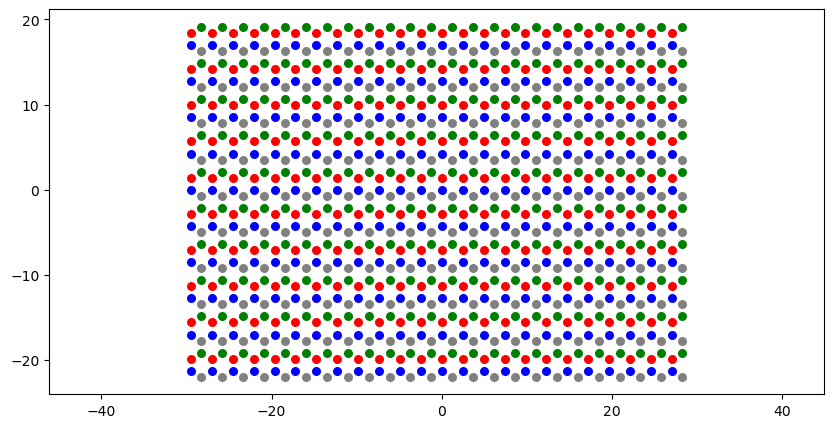

In [42]:
nmax = 5
coordA = np.array([i * latlength * np.array([0, np.sqrt(3)]) for i in range(-nmax, nmax)])
coordB = np.array([i * latlength * np.array([0, np.sqrt(3)]) + np.array([0, a0]) for i in range(-nmax, nmax)])
coordC = np.array([i * latlength * np.array([0, np.sqrt(3)]) + latlength * np.array([0.5, np.sqrt(3)/2]) for i in range(-nmax, nmax)])
coordD = np.array([i * latlength * np.array([0, np.sqrt(3)]) + np.array([0, a0]) + latlength * np.array([0.5, -np.sqrt(3)/2])for i in range(-nmax, nmax)])


plt.axes().set_aspect('equal', 'datalim')

x1, y1 = coordA.T
x2, y2 = coordB.T
x3, y3 = coordC.T
x4, y4 = coordD.T

for i in range (-12, 12):
    plt.scatter(x1 + i * latlength, y1, 30, 'blue')
    plt.scatter(x2 + i * latlength, y2, 30, 'red')
    plt.scatter(x3 + i * latlength, y3, 30, 'green')
    plt.scatter(x4 + i * latlength, y4, 30, 'gray')

### 3.2 Define and diagonalize the Hamilton matrix

$ H = \begin{pmatrix} 
0 & pb & 0 & 0 & \dots \\ 
bp & 0 & br & 0 & \dots \\ 
0 & rb & 0 & rg & \dots \\ 
0 & 0 & gr & 0 & \dots \\
\vdots & \vdots & \vdots & \vdots & \ddots
\end{pmatrix} $

$
pb = rg = \exp\left[ia_0\left(\frac{\sqrt{3}}{2}k_x+\frac{1}{2}k_y\right)\right] + \exp\left[ia_0\left(-\frac{\sqrt{3}}{2}k_x+\frac{1}{2}k_y\right)\right]\\
bp = gr = \exp\left[-ia_0\left(\frac{\sqrt{3}}{2}k_x+\frac{1}{2}k_y\right)\right] + \exp\left[-ia_0\left(-\frac{\sqrt{3}}{2}k_x+\frac{1}{2}k_y\right)\right]\\
br = gp = \exp\left(ia_0k_y\right)\\
rb = pg = \exp\left(-ia_0k_y\right)
$

In [43]:
atoms = 160 # Multiples of 4!

k_points = 201
kx_list = np.linspace(-np.pi/a0,np.pi/a0,k_points)
ky = 0
energy_list = []

for kx in kx_list:
        # define the offdiagonal elements
        offdiagonal1 = np.tile(np.array([
            np.exp(1j*a0*(np.sqrt(3)/2*kx+1/2*ky)) + np.exp(1j*a0*(-np.sqrt(3)/2*kx+1/2*ky)),
            np.exp(1j*a0*ky)
        ]),atoms//2)[0:-1]
        offdiagonal2 = np.tile(np.array([
            np.exp(-1j*a0*(np.sqrt(3)/2*kx+1/2*ky)) + np.exp(-1j*a0*(-np.sqrt(3)/2*kx+1/2*ky)),
            np.exp(-1j*a0*ky)
        ]),atoms//2)[0:-1]
        # Hamilton matrix
        ham = np.diag(offdiagonal1, k=1) + np.diag(offdiagonal2, k=-1)
        # energies are the eigenvalues
        energy_list.append(np.linalg.eigvalsh(ham))

In [44]:
energy_list = np.reshape(np.array(energy_list), (k_points, atoms))

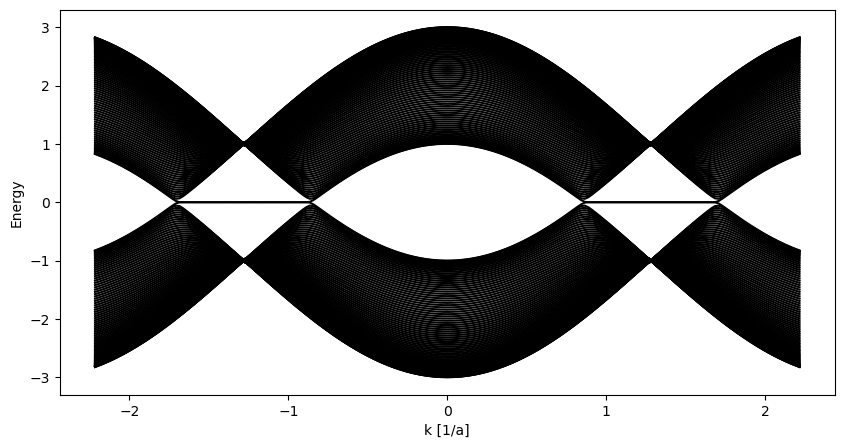

In [45]:
plt.xlabel('k [1/a]')
plt.ylabel('Energy')
for i in range(atoms):
    plt.plot(kx_list,energy_list[:,i], 'black')

### 3.3 Landau quantization & Quantum Hall effect (Metallic behavior due to edge channels)

In [46]:
atoms = 160 # Multiples of 4!
bfield = 0.1

array_mod_r = np.array([np.exp(bfield*1j*np.sqrt(3)/2*a0*i/2*np.sqrt(3)/2*latlength) for i in range(0,atoms)])[0:-1]
array_mod_l = np.array([np.exp(-bfield*1j*np.sqrt(3)/2*a0*i/2*np.sqrt(3)/2*latlength) for i in range(0,atoms)])[0:-1]

In [47]:
k_points = 201
kx_list = np.linspace(-np.pi/a0,np.pi/a0,k_points)
ky = 0
energy_list = []

for kx in kx_list:
        # define the offdiagonal elements
        offdiagonal1a = np.tile(np.array([np.exp(1j*a0*(np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] * array_mod_r
        offdiagonal1b = np.tile(np.array([np.exp(1j*a0*(-np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] * array_mod_l
        offdiagonal1c = np.tile(np.array([0,np.exp(1j*a0*ky)]),atoms//2)[0:-1] 
        offdiagonal2a = np.tile(np.array([np.exp(-1j*a0*(np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] * array_mod_r
        offdiagonal2b = np.tile(np.array([np.exp(-1j*a0*(-np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] * array_mod_l
        offdiagonal2c = np.tile(np.array([0,np.exp(-1j*a0*ky)]),atoms//2)[0:-1]
        # Hamilton matrix
        ham = np.diag(offdiagonal1a, k=1) + np.diag(offdiagonal1b, k=1) + np.diag(offdiagonal1b, k=1) + np.diag(offdiagonal2a, k=-1) + np.diag(offdiagonal2b, k=-1) + np.diag(offdiagonal2c, k=-1)
        # energies are the eigenvalues
        energy_list.append(np.linalg.eigvalsh(ham))

In [48]:
energy_list = np.reshape(np.array(energy_list), (k_points, atoms))

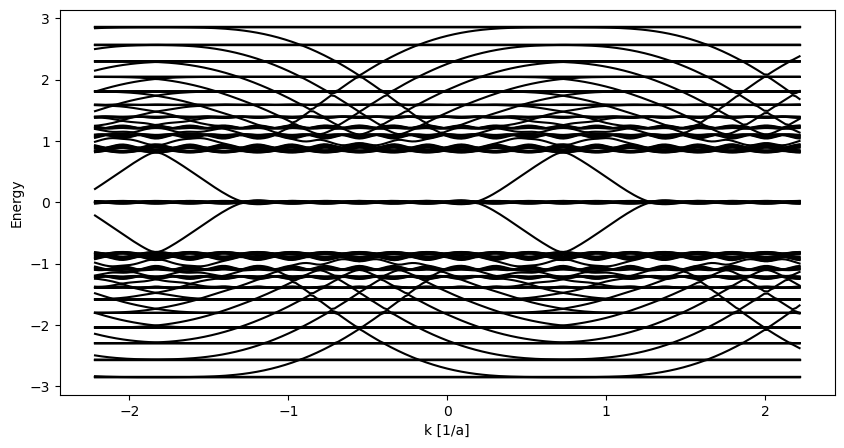

In [49]:
plt.xlabel('k [1/a]')
plt.ylabel('Energy')
for i in range(atoms):
    plt.plot(kx_list,energy_list[:,i], 'black')

- When we introduce a magnetic field along z, the hopping terms are modified

$ \vec{A}(\vec{r}) = -B y \vec{e}_x $

$ \vec{B}(\vec{r}) = \nabla \times \vec{A}(\vec{r}) $

additional factor: $ \exp\left(i\int_\mathrm{hopping}\vec{A}\cdot\mathrm{d}\vec{r}\right) = \exp\left(-i(x_2-x_1) B \frac{y_1+y_2}{2}\right)$

- 2016: Nobel Prize Physics: David Thouless, Duncan Haldane and Michael Kosterlitz “for theoretical discoveries of topological phase transitions and topological phases of matter”

## 4. Twisted bilayers & Moiré patterns

In [31]:
a0 = 1.418 # [a0] = A = 10^(-10) m
latlength = np.sqrt(3.) * a0
z0 = -3.349

twist = 12
nmax = 4*twist

alpha =  2. * np.arctan(np.sqrt(3.)/2./(3.*twist+1.5))

print ("Twisting angle [°]:   ",alpha*180/np.pi)
print ("Number of atoms (analytical, per sublattice):   ", ((3.*twist+1.5)**2+(np.sqrt(3.)/2.)**2)*np.sin(np.pi/3.)/(3*np.sin(np.pi/3)))

Twisting angle [°]:    2.645908381192724
Number of atoms (analytical, per sublattice):    468.99999999999994


In [32]:
# lattice vectors sublattice 1
a1 = latlength * np.array([1., 0., 0.])
a2 = latlength * np.array([-0.5, np.sqrt(3.)/2., 0.])

# lattice vectors sublattice 2
b1 = np.array([ np.cos(alpha) * a1[0] - np.sin(alpha) * a1[1], np.sin(alpha) * a1[0] + np.cos(alpha) * a1[1], 0. ])
b2 = np.array([ np.cos(alpha) * a2[0] - np.sin(alpha) * a2[1], np.sin(alpha) * a2[0] + np.cos(alpha) * a2[1], 0. ])

# superlattice vectors (Moire pattern periodicity)
s1 = latlength/np.sqrt(3.) * np.array([-np.sqrt(3.)/2., 3.0*twist+1.5,0.])
s2 = np.array([np.cos(-2.*np.pi/3.)*s1[0]-np.sin(-2.*np.pi/3.)*s1[1], np.sin(-2.*np.pi/3.)*s1[0]+np.cos(-2.*np.pi/3.)*s1[1], 0.])

# reciprocal lattice vectors
r1 = 2 * np.pi * np.array([s2[1], -s2[0], 0.]) / abs(s1[0] * s2[1] - s1[1] * s2[0])
r2 = 2 * np.pi * np.array([-s1[1], s1[0], 0.]) / abs(s1[0] * s2[1] - s1[1] * s2[0])

In [33]:
#Coordinates sublattice 1 & 2 for layers 1 & 2
coords1a = np.array([i * a1 + j * a2 for i in range(-nmax-1, nmax+1) for j in range(-nmax-1, nmax+1)])
coords2a = np.array([i * b1 + j * b2 + [0.,0.,z0] for i in range(-nmax-1, nmax+1) for j in range(-nmax-1, nmax+1)])

coords1b = np.array([i * a1 + j * a2 + [0.,a0,0.] for i in range(-nmax-1, nmax+1) for j in range(-nmax-1, nmax+1)])
coords2b = np.array([i * b1 + j * b2 + [-np.sin(alpha)*a0,np.cos(alpha)*a0,z0] for i in range(-nmax-1, nmax+1) for j in range(-nmax-1, nmax+1)])

coords1 = np.concatenate((coords1a, coords1b), axis=0)
coords2 = np.concatenate((coords2a, coords2b), axis=0)

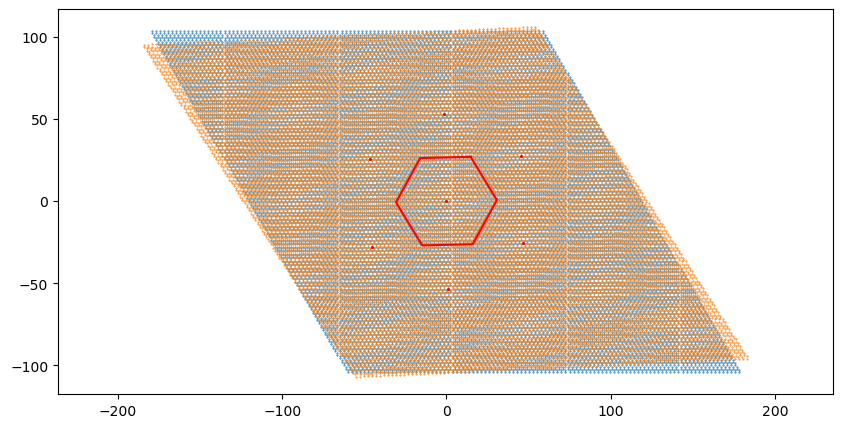

In [34]:
plt.axes().set_aspect('equal', 'datalim')
x1, y1, z1 = coords1.T
x2, y2, z2 = coords2.T
plt.scatter(x1, y1, s=30/twist**2)
plt.scatter(x2, y2, s=30/twist**2)

plt.scatter([0, s1[0], s2[0], -s1[0], -s2[0], s1[0]+s2[0], -s1[0]-s2[0]],
            [0, s1[1], s2[1], -s1[1], -s2[1], s1[1]+s2[1], -s1[1]-s2[1]],s=200/twist**2, 
            c='r')

# define corner points
corner1 = np.array(( 2*s1+1*s2)/3)
corner2 = np.array(( 1*s1-1*s2)/3)
corner3 = np.array((-1*s1-2*s2)/3)
corner4 = np.array((-2*s1-1*s2)/3)
corner5 = np.array((-1*s1+1*s2)/3)
corner6 = np.array(( 1*s1+2*s2)/3)

# plot the unit cell boundaries
plt.plot(
    [corner1[0], corner2[0], corner3[0], corner4[0], corner5[0], corner6[0], corner1[0]],
    [corner1[1], corner2[1], corner3[1], corner4[1], corner5[1], corner6[1], corner1[1]],
    c='r')

plt.savefig('lattice.png', dpi=300)